# ***Brain Tumor Classification System***

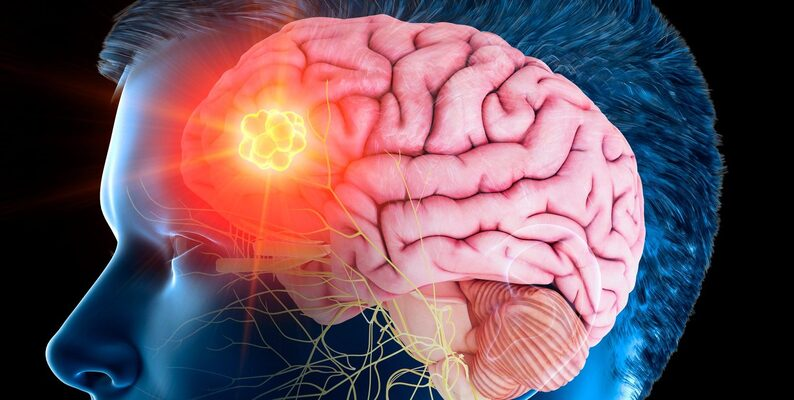

# *Import Rquired Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pickle
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# *Downloading Dataset*

In [2]:
from google.colab import files
uploaded= files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [3]:
!kaggle datasets download -d rm1000/brain-tumor-mri-scans

Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans
License(s): CC0-1.0
 98% 231M/236M [00:03<00:00, 85.7MB/s]
100% 236M/236M [00:03<00:00, 75.6MB/s]


# *UnZipping brain-tumor-mri-scans images*

In [4]:
!unzip brain-tumor-mri-scans.zip -d brain_tumor

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor/healthy/0402.jpg  
  inflating: brain_tumor/healthy/0403.jpg  
  inflating: brain_tumor/healthy/0404.jpg  
  inflating: brain_tumor/healthy/0405.jpg  
  inflating: brain_tumor/healthy/0406.jpg  
  inflating: brain_tumor/healthy/0407.jpg  
  inflating: brain_tumor/healthy/0408.jpg  
  inflating: brain_tumor/healthy/0409.jpg  
  inflating: brain_tumor/healthy/0410.jpg  
  inflating: brain_tumor/healthy/0411.jpg  
  inflating: brain_tumor/healthy/0412.jpg  
  inflating: brain_tumor/healthy/0413.jpg  
  inflating: brain_tumor/healthy/0414.jpg  
  inflating: brain_tumor/healthy/0415.jpg  
  inflating: brain_tumor/healthy/0416.jpg  
  inflating: brain_tumor/healthy/0417.jpg  
  inflating: brain_tumor/healthy/0418.jpg  
  inflating: brain_tumor/healthy/0419.jpg  
  inflating: brain_tumor/healthy/0420.jpg  
  inflating: brain_tumor/healthy/0421.jpg  
  inflating: brain_tumor/healthy/0422.jpg  
  inflating: brain_tumor/

# Making a directory path for our Data

In [5]:
data_dir = pathlib.Path('/content/brain_tumor')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/brain_tumor/glioma/1489.jpg'),
 PosixPath('/content/brain_tumor/glioma/1020.jpg'),
 PosixPath('/content/brain_tumor/glioma/1006.jpg'),
 PosixPath('/content/brain_tumor/glioma/0425.jpg'),
 PosixPath('/content/brain_tumor/glioma/0626.jpg')]

# *Getting The number of Images in Dataset*

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

7023


# *listing all brain glioma Images*

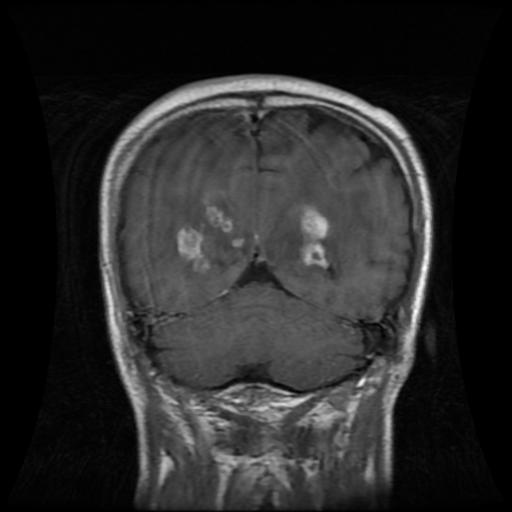

In [8]:
glioma = list(data_dir.glob('glioma/*'))
PIL.Image.open(str(glioma[0]))

# *listing all brain healthy Images*

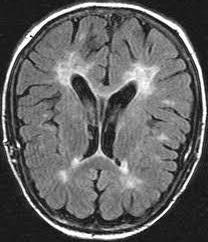

In [9]:
healthy= list(data_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

# *listing all brain meningioma Images*

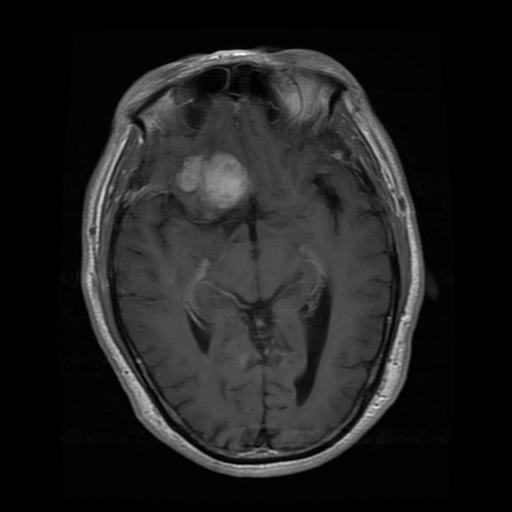

In [10]:
meningioma= list(data_dir.glob('meningioma/*'))
PIL.Image.open(str(meningioma[0]))

# *listing all brain pituitary Images*

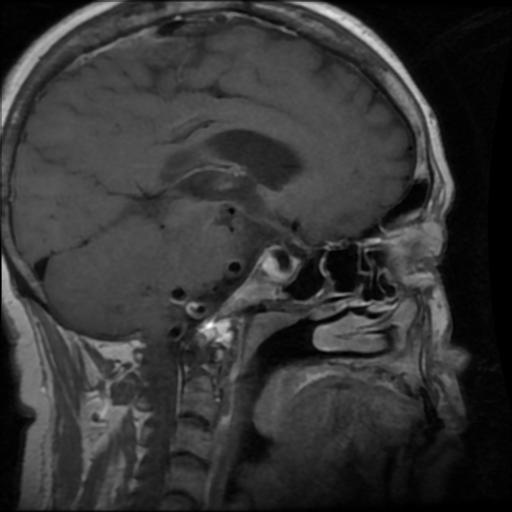

In [11]:
pituitary= list(data_dir.glob('pituitary/*'))
PIL.Image.open(str(pituitary[0]))

# *Plotting The Count of each Class*

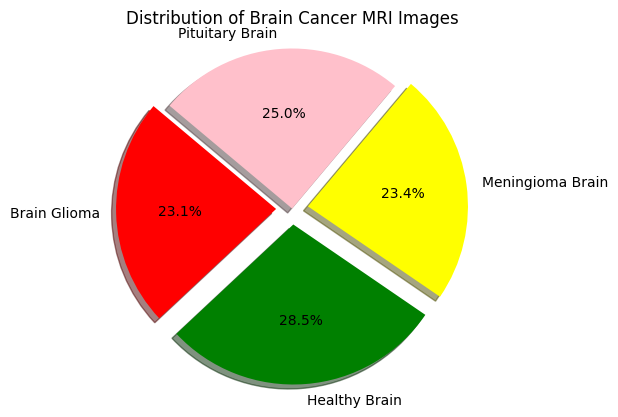

In [12]:
# Count the number of images in each class
glioma_count = len(list(data_dir.glob('glioma/*.jpg')))
healthy_count = len(list(data_dir.glob('healthy/*.jpg')))
meningioma_count = len(list(data_dir.glob('meningioma/*.jpg')))
pituitary_count = len(list(data_dir.glob('pituitary/*.jpg')))


# Create a pie chart
labels = ['Brain Glioma', 'Healthy Brain', 'Meningioma Brain','Pituitary Brain']
sizes = [glioma_count, healthy_count,meningioma_count ,pituitary_count ]
colors = ['red', 'green', 'yellow','pink']
explode = (0.1, 0.1, 0.1,0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Brain Cancer MRI Images')
plt.show()


# *Making a dictionary for all lung Images*

In [13]:
brain_images_dict = {
    'healthy': list(data_dir.glob('healthy/*')),
    'glioma': list(data_dir.glob('glioma/*')),
    'meningioma': list(data_dir.glob('meningioma/*')),
    'pituitary': list(data_dir.glob('pituitary/*')),
}

# *Making a dictionary for all lables*

In [14]:
brain_labels_dict = {
    'healthy': 0,
    'glioma': 1,
    'meningioma': 2,
    'pituitary':3,

}

# *Separating The Features and Target and Resizing The Images*

In [15]:
X, y = [], []
for diagnosis, images in brain_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(80,80))
        X.append(resized_img)
        y.append(brain_labels_dict[diagnosis])

In [16]:
X = np.array(X)
y = np.array(y)

# *Splitting The Data into train and test*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)

# *Normaliztion*

In [18]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# *CNN Architecture*

In [19]:
# CNN Architecture with Regularization and Dropout
num_classes = 4

model1 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),


    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),


    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),


    layers.Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model1.fit(X_train_scaled, y_train, validation_split=0.15, batch_size=32, epochs=50)




Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 76s 464ms/step - accuracy: 0.5486 - loss: 2.7184 - val_accuracy: 0.7020 - val_loss: 1.1493
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 78s 440ms/step - accuracy: 0.7686 - loss: 0.9239 - val_accuracy: 0.6629 - val_loss: 1.0968
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 81s 437ms/step - accuracy: 0.7814 - loss: 0.8352 - val_accuracy: 0.8270 - val_loss: 0.7725
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 81s 429ms/step - accuracy: 0.8164 - loss: 0.7121 - val_accuracy: 0.8125 - val_loss: 0.7214
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 71s 446ms/step - accuracy: 0.8349 - loss: 0.6612 - val_accuracy: 0.8248 - val_loss: 0.7028
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 79s 425ms/step - accuracy: 0.8419 - loss: 0.6326 - val_accuracy: 0.8225 - val_loss: 0.7035
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 84s 441ms/step - accuracy: 0.8534 - loss: 0.6069 - val_accuracy: 0.8270 - val_loss: 0.6975
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 82s 445ms/step - accuracy: 0.8621 - loss: 0

# *Evaluating The Model*

In [20]:
model1.evaluate(X_test_scaled,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9304 - loss: 0.4535


[0.4284144639968872, 0.9269449710845947]

# *Prediction of Model*

In [21]:
predictions = model1.predict(X_test_scaled)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step


array([[3.3394244e-04, 1.0381623e-03, 9.9500042e-01, 3.6274579e-03],
       [1.0650037e-04, 9.9243897e-01, 7.4176714e-03, 3.6867896e-05],
       [2.3500678e-04, 1.6352789e-04, 9.9960119e-01, 3.3196321e-07],
       ...,
       [2.4242430e-05, 2.4708020e-04, 7.9632715e-05, 9.9964905e-01],
       [6.1752316e-06, 5.7370260e-02, 9.4261545e-01, 8.1440876e-06],
       [2.3927935e-03, 2.4460204e-04, 5.3160591e-04, 9.9683100e-01]],
      dtype=float32)

# *plotting random images with predicted and True Class*

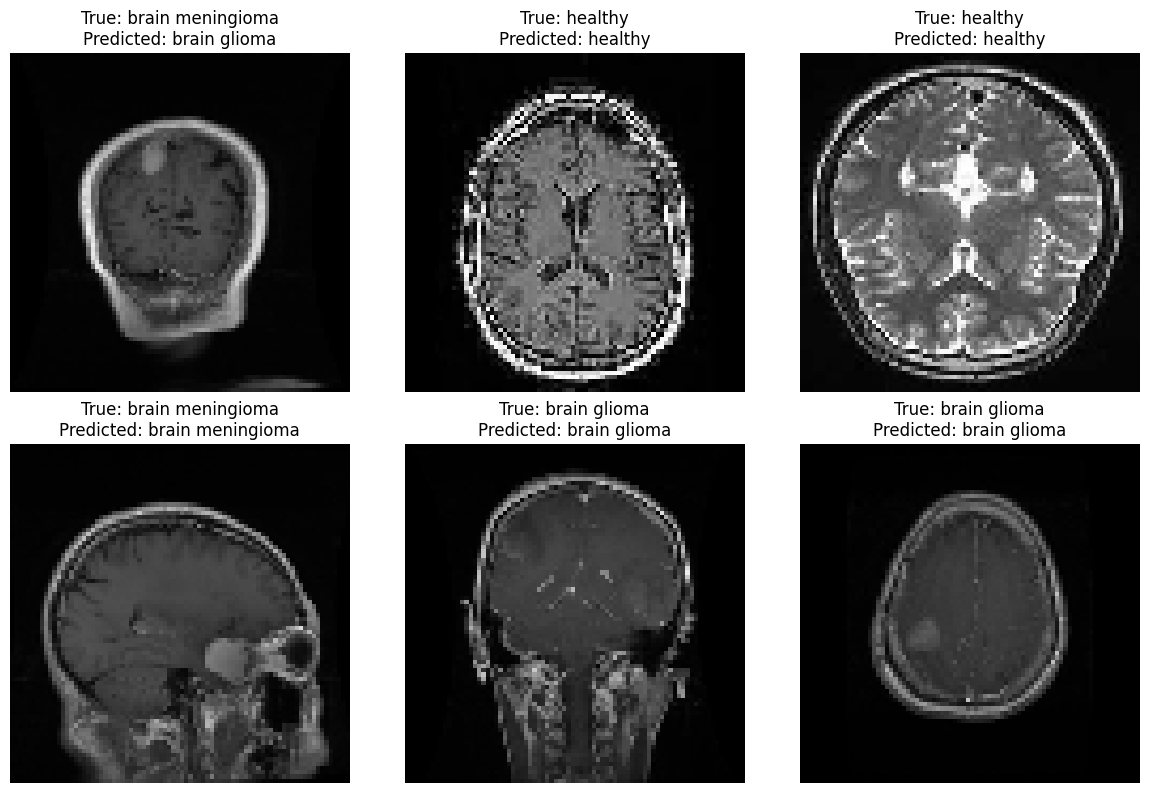

In [22]:
label_to_class = {
    0: 'healthy',
    1: 'brain glioma',
    2: 'brain meningioma',
    3: 'brain pituitary',
}

# Select a random subset of images to display
num_images_to_display = 6
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, index in enumerate(random_indices):
    image = X_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    axes[i].imshow(image)
    axes[i].set_title(f"True: {label_to_class[true_label]}\nPredicted: {label_to_class[predicted_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# *Plot training & validation accuracy values*

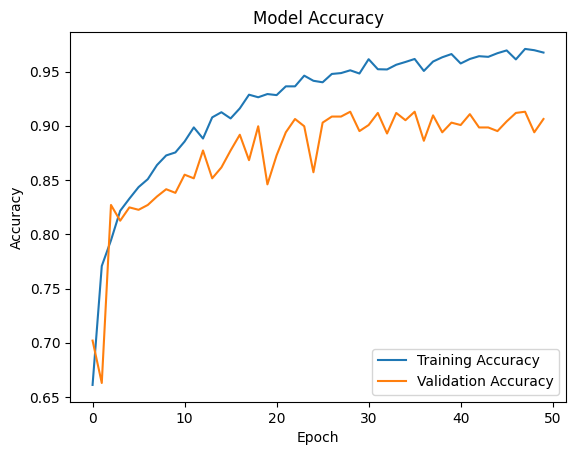

In [23]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# *Plot training & validation loss values*

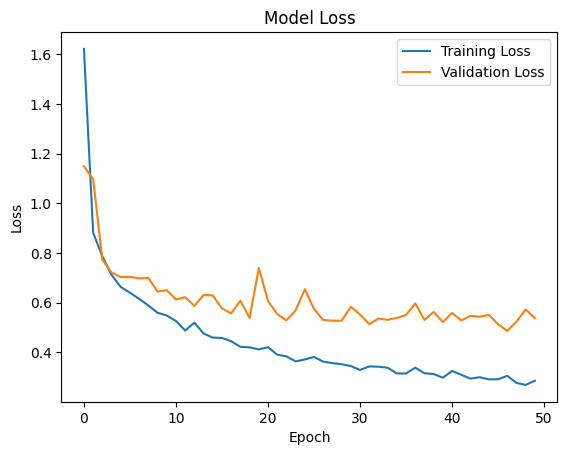

In [24]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [31]:
from sklearn.metrics import classification_report

y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_test, y_pred, target_names=['healthy', 'brain glioma', 'brain meningioma', 'brain pituitary']))


                  precision    recall  f1-score   support

         healthy       0.96      0.96      0.96       315
    brain glioma       0.90      0.90      0.90       246
brain meningioma       0.86      0.86      0.86       236
 brain pituitary       0.97      0.97      0.97       257

        accuracy                           0.93      1054
       macro avg       0.92      0.92      0.92      1054
    weighted avg       0.93      0.93      0.93      1054



# *Confusion Matrix*

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step


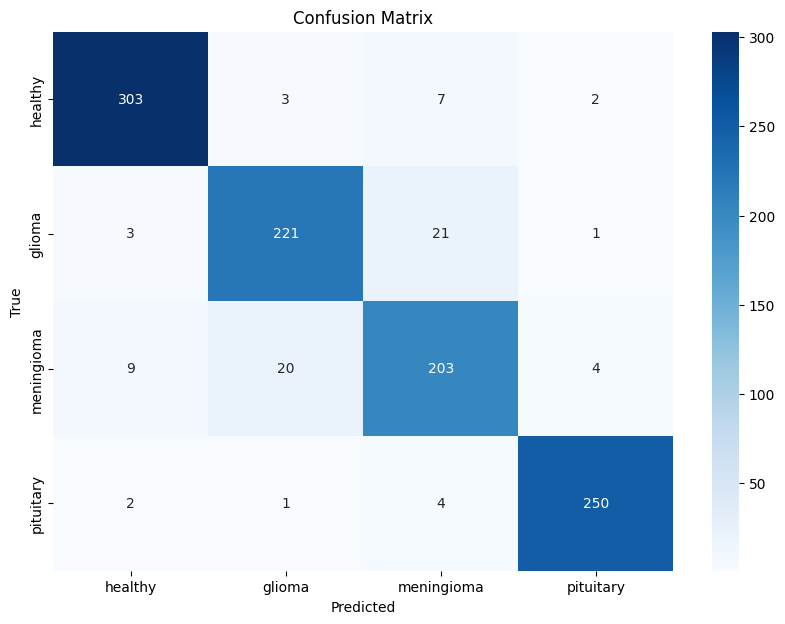

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
y_pred = np.argmax(model1.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['healthy', 'glioma', 'meningioma','pituitary'],
            yticklabels=['healthy', 'glioma', 'meningioma','pituitary'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# *Saving The Model*

In [26]:
model1.save('Brain_Cancer_model.keras')